Welcome to Day 3 of the 5-Day Data Challenge! Today, we're going to be looking at **outliers**.

Outliers are those data points that are really far from the rest of your data points. They can show up due to errors in data entry or measurement, or just because there's variation in the the population you're looking at and you happened to see one of the more unusual values. Whatever the reason they show up, knowing how to identify and handle outliers is an important part of data cleaning. Today, we're going to learn how to:

* Visualize outliers
* Identify which rows in our dataframe contain outliers
* Pick and apply different strategies for handling outliers

I'll start by introducing each concept or technique, and then you'll get a chance to apply it with an exercise (look for the **Your turn!** section). Ready? Let's get started!

___

**Kernel FAQs:**

* **How do I get started?**   To get started, click the blue "Fork Notebook" button in the upper, right hand corner. This will create a private copy of this notebook that you can edit and play with. Once you're finished with the exercises, you can choose to make your notebook public to share with others. :)

* **How do I run the code in this notebook?** Once you fork the notebook, it will open in the notebook editor. From there you can write code in any code cell (the ones with the grey background) and run the code by either 1) clicking in the code cell and then hitting CTRL + ENTER or 2) clicking in the code cell and the clicking on the white "play" arrow to the left of the cell. If you want to run all the code in your notebook, you can use the double, "fast forward" arrows at the bottom of the notebook editor.

* **How do I save my work?** Any changes you make are saved automatically as you work. You can run all the code in your notebook and save a static version by hitting the blue "Commit & Run" button in the upper right hand corner of the editor. 

* **How can I find my notebook again later?** The easiest way is to go to your user profile (https://www.kaggle.com/replace-this-with-your-username), then click on the "Kernels" tab. All of your kernels will be under the "Your Work" tab, and all the kernels you've upvoted will be under the "Favorites" tab.

___


# Get our environment set up
___

First, let's read in the libraries and data we'll be using. For today, I've chosen to use a dataset on the reimbursements given to Brazil's House of Deputies from 2009 to 2017. Part of the reason I chose this dataset is because this is one of those cases where we're actually really interested in the outliers. If someone's spending a huge amount of public funds, that's probably something we want to pay attention to.

In [1]:
# libraries we'll use
library(tidyverse) # handy utility functions
library(outliers) # library for identifying outliers

# read in data
data_v1 <- read_csv("../input/deputies_dataset.csv")
data_v2 <- read_csv("../input/dirty_deputies_v2.csv")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1.9000     ✔ purrr   0.2.4     
✔ tibble  1.4.2          ✔ dplyr   0.7.4     
✔ tidyr   0.8.0          ✔ stringr 1.2.0     
✔ readr   1.2.0          ✔ forcats 0.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Parsed with column specification:
cols(
  bugged_date = col_double(),
  receipt_date = col_character(),
  deputy_id = col_double(),
  political_party = col_character(),
  state_code = col_character(),
  deputy_name = col_character(),
  receipt_social_security_number = col_double(),
  receipt_description = col_character(),
  establishment_name = col_character(),
  receipt_value = col_double()
)
Parsed with column specification:
cols(
  deputy_name = col_character(),
  deputy_state = col_character(),
  political_party = col_character(),
  refund_description = col_character

# Identifying outliers with visualization
____

First off: what's an outlier? In plain English, it's a data point that's very far from the other data points. Mathematically, an outlier is usually defined as an observation more than three standard deviations from the mean (although sometimes you'll see 2.5 or 2 as well). It's not [the only mathmatical definition](https://pdfs.semanticscholar.org/5935/f52caf1df059ed9e301ad1fbfbd8d01bfa18.pdf), but since it's the one that's used the most often that's what we'll use here as well. 

> **Z-score**: The number of standard deviations away from the mean that a particular observation is. (You can see the mathematical definition [here](http://mathworld.wolfram.com/z-Score.html), if you're curious.) A negative Z-score means an observation is below the mean, while a positive one means it above it. The further away from 0 the Z-Score is, the further away from the mean your observation is. 

One of the easiest ways to see if your dataset has outliers is to plot your data. The type of plot you pick will depend on how many and what kind of variable you're interesting in looking at. Today, we're going to look at three different plots.

## Univariate outliers

Univariate just means "one variable". When I'm looking for variation in just one variable, I like to use boxplots. This is because outliers are shown as points on a box plot, so it's easy to see if we have any outliers in our data. In this notebook, I'll be using the `geom_boxplot()` function from ggp2lot.  

> **Haven't used ggplot before?** The syntax is pretty different from the basic `plot()` function in R. You might like to check out [this tutorial](https://www.kaggle.com/rtatman/visualizing-data-with-ggplot2) to help you get started.

For this example, we're going to look at the refund value for the different refunds made to members of Brazil's  House of Deputies.

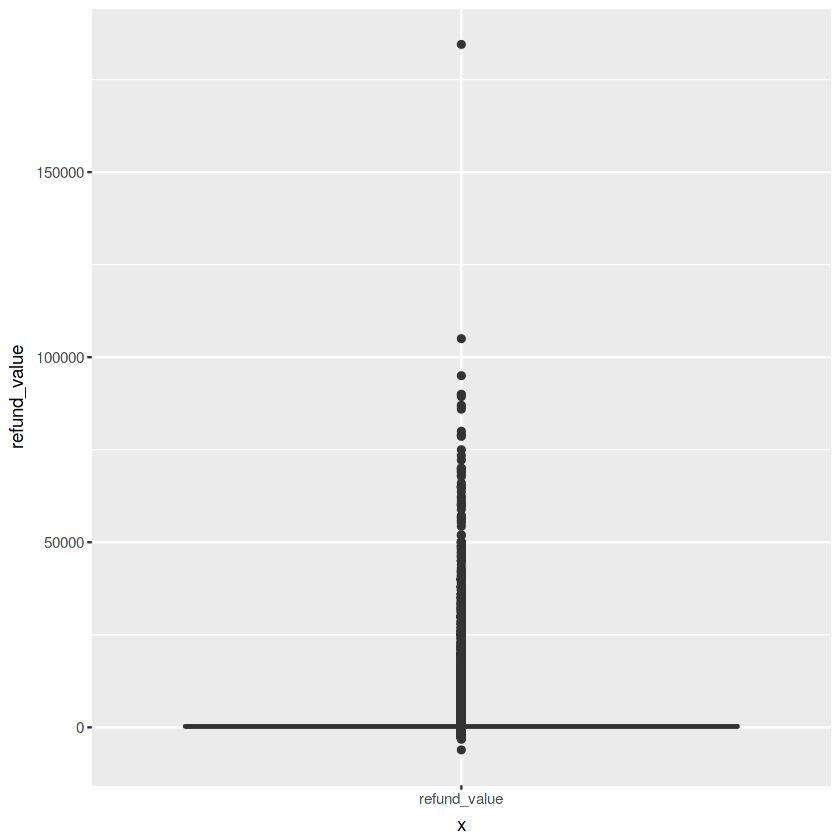

In [2]:
# use a box plot to see if we have outliers in the refund_value column
# of the data_v2 dataset
ggplot(data_v2, aes(x = "refund_value", y = refund_value)) +
    geom_boxplot()

Wow, it looks like we have a lot of outliers! That thick line near 0 is actually the box part of our box plot: the "line" we see above it is actually a bunch of points showing outliers that are overlapping with each other.

## Multivariate outliers (Categorical + numeric)

One thing that might help us understand these outliers better is breaking apart the column we're looking at based on the values in another column. Here, I'm going to look at the refunds for each different refund_description separately.

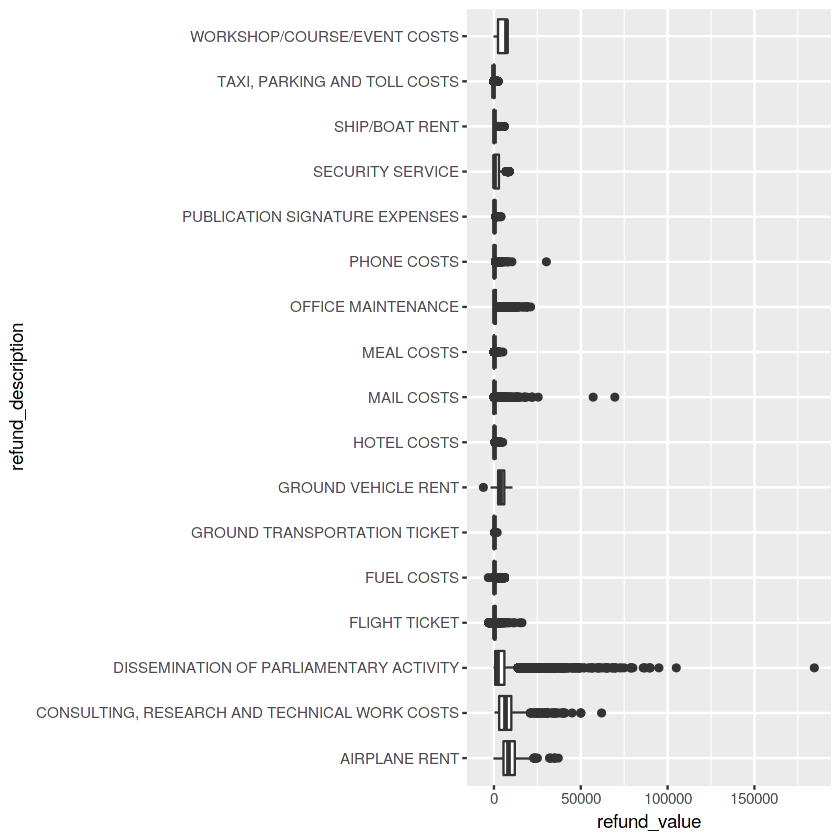

In [3]:
# look for outliers for each different refund description
ggplot(data_v2, aes(refund_description, refund_value)) +
    geom_boxplot() +
    coord_flip() # flip our plot so the labels are easier to read

This tell us much more about this dataset! It looks like there are a lot of large outliers in the amounts reimbursed for "Dissemination of parliamentary activity", but "Mail Costs" and "Consulting, research and technical work costs" also have some large outlier

## Multivariate outliers (Numeric + numeric)

Sometimes you want to see if you have outliers when two numeric variables are considered together. Especially if you're planning on doing some sort of regression, you definitely want to know if you have values that are far off trend.

The best way to look for outliers in two numeric variables is using a scatter plot. Here I'm making a scatter plot using `geom_point()`. 

Warning message:
“Removed 891 rows containing missing values (geom_point).”

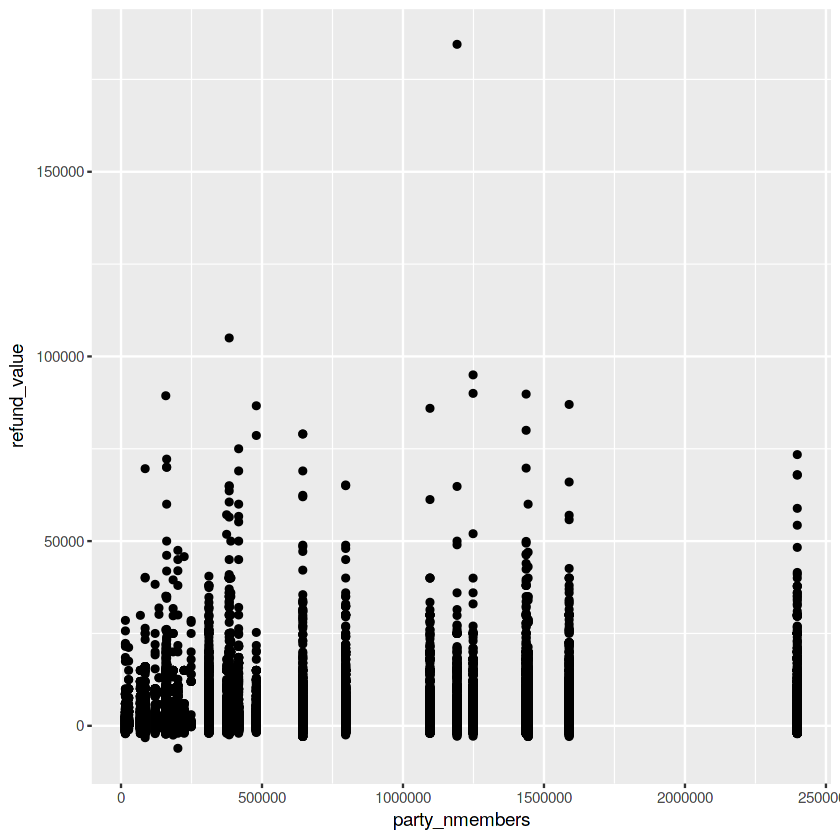

In [4]:
ggplot(data_v2, aes(party_nmembers, refund_value)) +
    geom_point()

This plot shows us that there are outliers in refund value all along the different number of members in each party. The reason we see strong vertical lines here is because all the politicians from the same political party, and thus all their expenses, are associated with a specific number of party members.

## Your turn!
____

You'll be working with the data_v1 dataset. Spend some time visualizing any outliers in the "receipt_value" column. Does it have a relationship with the "receipt_description" column?

> **Hint:** You may find it easier to break up your code into multiple cells. To do this while you're in edit mode, you can click in the code cell, and then hit the blue +^ or +╲╱ buttons in the upper right hand corner. You can also click in the cell where you want it to be split and hit the Ctrl + Shift + Minus buttons at the same time.

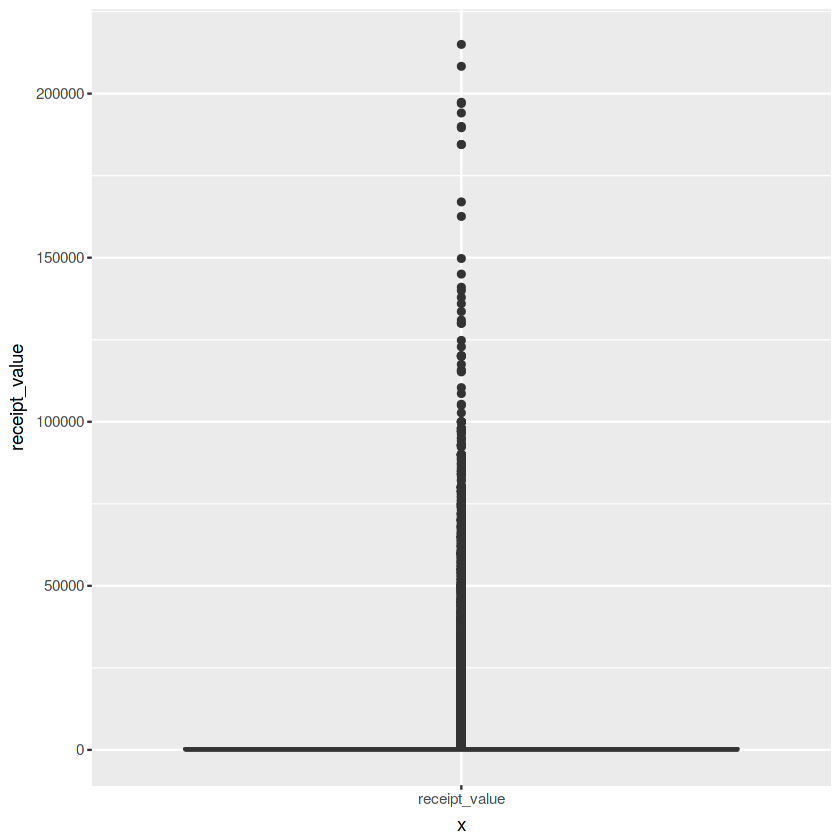

In [5]:

ggplot(data_v1, aes(x = "receipt_value", y = receipt_value)) +
    geom_boxplot()

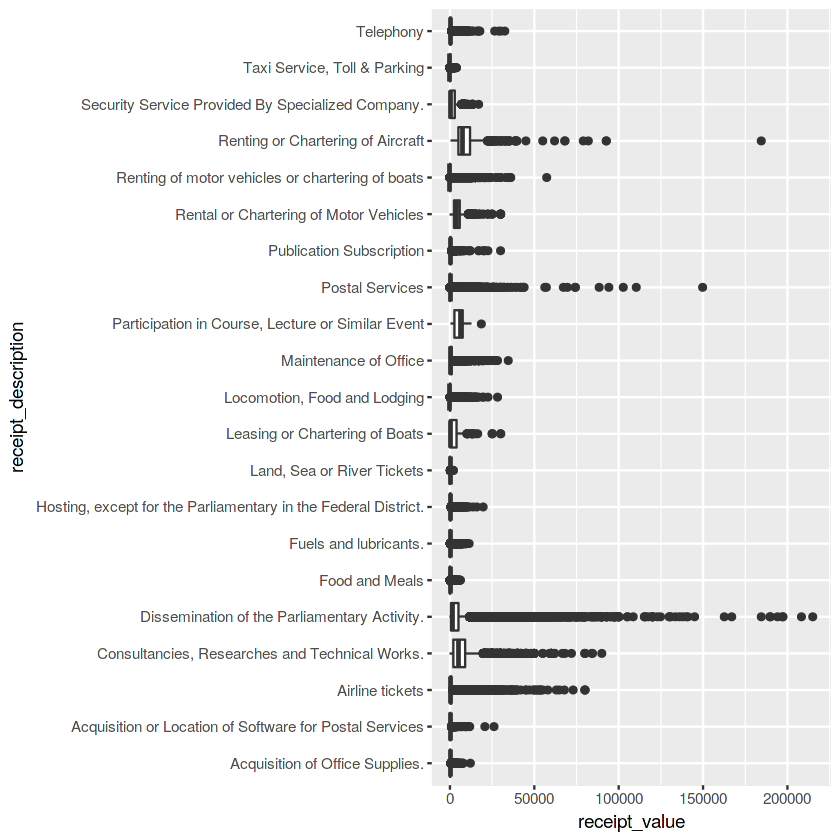

In [6]:
ggplot(data_v1, aes(receipt_description, receipt_value)) +
    geom_boxplot() +
    coord_flip() # flip our plot so the labels are easier to read

# Identifying which rows in our dataframe contain outliers
___

Alright, now we know some techniques for visualizing our outliers, let's learn how to identify which rows in our dataframe contain outliers. As you may remember from above, one way to identify outliers is to determine which points have a z-score that's far from 0. We can use the `scores()` function from [Lukasz Komsta' s outliers package](https://cran.r-project.org/web/packages/outliers/outliers.pdf) to quickly calculate the z-score for every value in a specific column of our data frame. 

In [7]:
# get the z-scores for each value in refunt_value
outlier_scores <- scores(data_v2$refund_value)

Now we just need to look and see which of those values are outside of some threshold we pick. I'm going to call every value more than three standard deviation from the mean an outlier. I'm going to use that rule and my vector of z-scores to create a new vector that's "TRUE" if a value is an outlier and "FALSE" if it's not. Then I'll add it to my dataframe as a new column.

In [8]:
# create a logical vector the same length as outlier_scores
# that is "TRUE" if outlier_scores is greater than 3 or
# less than negative 3
is_outlier <- outlier_scores > 3 | outlier_scores < -3

# add a column with info whether the refund_value is an outlier
data_v2$is_outlier <- is_outlier

Now that we have a column "is_outlier" that tells us whether each row has an outlier in the "refund_value" column, we can use that to plot the outlier and non-outlier values separately.

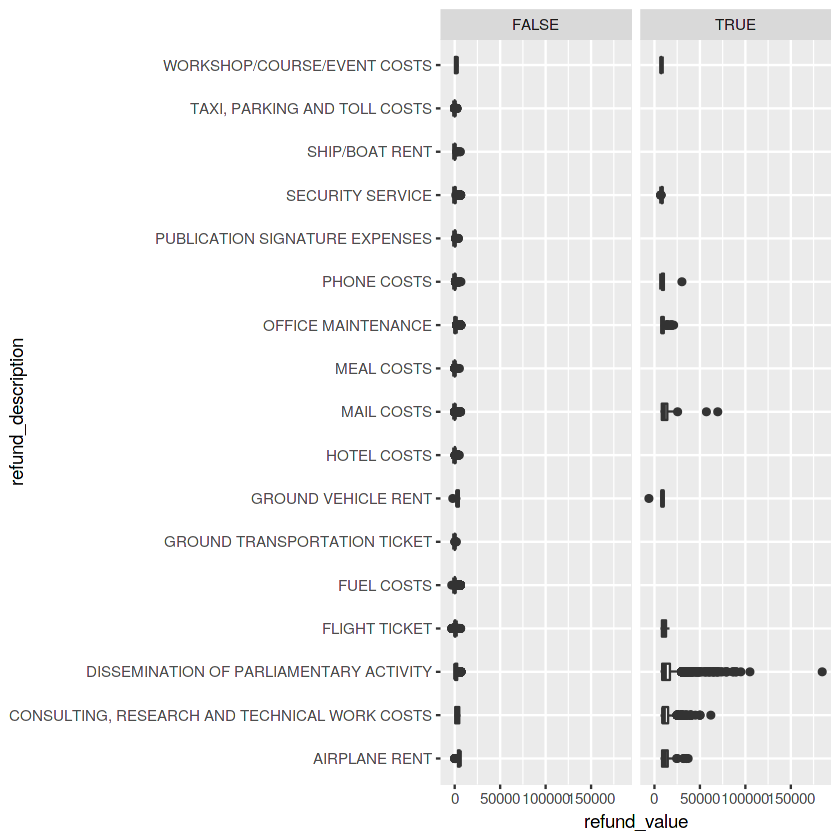

In [9]:
# look at the same plot as above, with outliers in a separate facet
ggplot(data_v2, aes(refund_description, refund_value)) +
    geom_boxplot() +
    coord_flip() +
    facet_wrap(~is_outlier)

You can also use the vector of z-scores and your threshold to filter your dataframe and just end up with the outlier values, like so:

In [10]:
# create a dataframe with only outliers
data_v2_outliers <- data_v2[outlier_scores > 3| outlier_scores < -3, ]
# take a peek
head(data_v2_outliers)

deputy_name,deputy_state,political_party,refund_description,company_name,company_id,refund_date,refund_value,party_pg,party_en,party_tse,party_regdate,party_nmembers,party_ideology1,party_ideology2,party_ideology3,party_ideology4,party_position,is_outlier
JOSÉ CARLOS ALELUIA,BA,DEM,"CONSULTING, RESEARCH AND TECHNICAL WORK COSTS",CARVALHO & CARDOSO ADVOGADOS ASSOCIADOS,2.179307e+13,2016-07-13,18000.00,Democratas,Democrats,25,11-09-86,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NA,Rightwing,TRUE
JOSÉ CARLOS ALELUIA,BA,DEM,"CONSULTING, RESEARCH AND TECHNICAL WORK COSTS",CARVALHO & CARDOSO ADVOGADOS ASSOCIADOS,2.179307e+13,2016-10-26,10000.00,Democratas,Democrats,25,11-09-86,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NA,Rightwing,TRUE
JOSÉ CARLOS ALELUIA,BA,DEM,"CONSULTING, RESEARCH AND TECHNICAL WORK COSTS",CARVALHO DA SILVA ADVOGADOS,2.179307e+13,2016-12-14,12000.00,Democratas,Democrats,25,11-09-86,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NA,Rightwing,TRUE
JOSÉ CARLOS ALELUIA,BA,DEM,DISSEMINATION OF PARLIAMENTARY ACTIVITY,SAVEIRO COMUNICAÇÃO LTDA ME,2.240991e+13,2016-03-03,7073.17,Democratas,Democrats,25,11-09-86,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NA,Rightwing,TRUE
JOSÉ CARLOS ALELUIA,BA,DEM,DISSEMINATION OF PARLIAMENTARY ACTIVITY,SAVEIRO COMUNICAÇÃO LTDA ME,2.240991e+13,2016-02-03,8695.12,Democratas,Democrats,25,11-09-86,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NA,Rightwing,TRUE
JOSÉ CARLOS ALELUIA,BA,DEM,DISSEMINATION OF PARLIAMENTARY ACTIVITY,SAVEIRO COMUNICAÇÃO LTDA ME,2.240991e+13,2016-01-15,6987.95,Democratas,Democrats,25,11-09-86,1095712,Economic liberalism,Liberal conservatism,Christian democracy,NA,Rightwing,TRUE


Now that we've learned how to see out outliers and find whether each row in our dataframe has an outlier in our target column, the next step is to pick a strategy for handling those  outliers. First, however, why don't you try your own hand at identifying the rows in your dataframe that have outliers?

## Your turn!
____

Identify which rows in the "receipt_value" column of data_v1 dataset are outliers. Try plotting them or looking through just the outliers. Do you notice anything interesting? Are there any differences between data_v1 and data_v2?

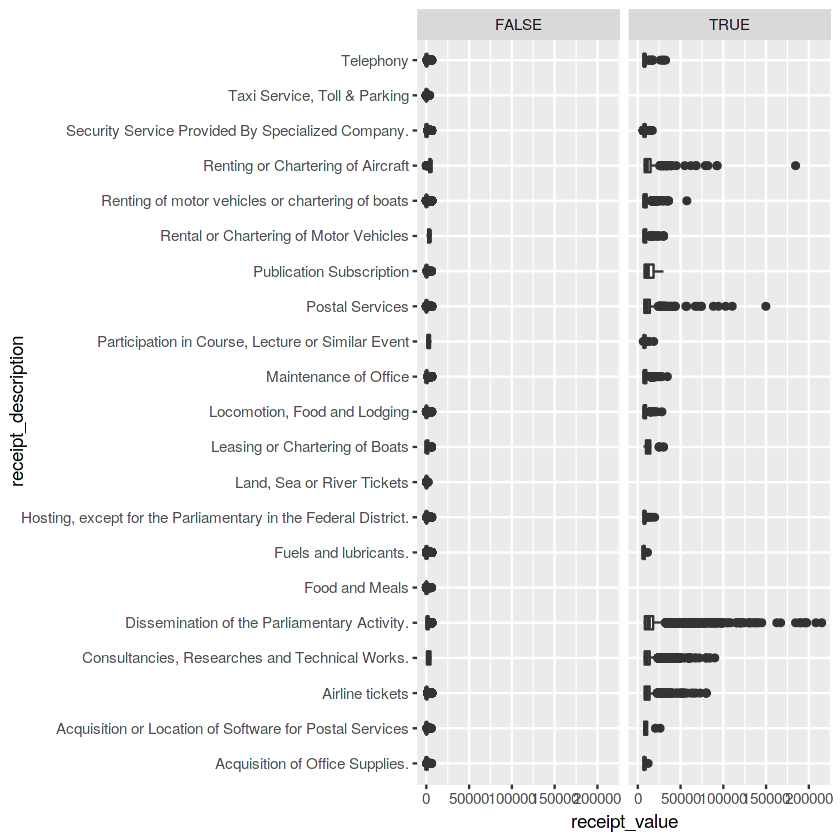

In [11]:
# get the z-scores for each value in refunt_value
outlier_scores_v1 <- scores(data_v1$receipt_value)

is_outlier_v1 <- outlier_scores_v1 > 3 | outlier_scores_v1 < -3

# add a column with info whether the refund_value is an outlier
data_v1$is_outlier_v1 <- is_outlier_v1
# look at the same plot as above, with outliers in a separate facet
ggplot(data_v1, aes(receipt_description, receipt_value)) +
    geom_boxplot() +
    coord_flip() +
    facet_wrap(~is_outlier_v1)

# Some strategies for handling outliers
___

Ok, now that we know which specific values are outliers... what do we do with them? There are a lot of different strategies for what to do with outliers, and which one you should use for your specific project depends on what your goals are, and why you think you have outliers. Here, I'm going to talk about three, and when you might consider using each.


## Removing rows with outliers from your dataset

Probably the easiest option for handling outliers (and, I'll admit, the one that I use when I'm in a hurry) is just to drop the rows that have outliers in them. 

**Use this strategy when:**
* You don't have a lot of time to figure out why you have outliers
* You have a large amount of data without outliers
* You have outliers due to measurement or data entry errors

**Code example:**

In [13]:
# only get rows where the is_outlier column we made
# is equal to "FALSE"
data_v2_outliers_rm <- data_v2[data_v2$is_outlier == F, ]

## Consider outliers & inliers separately

One option for handling outliers is to subest your data and consider outliers and inliers--points that aren't outliers--separately. I'm not going to go over how to separate your outliers and inliers into two separate dataframes here because I covered that in the section above.

**Use this strategy when**:

* You're interested in what causes outliers
* You think outliers may be from a different underlying population (for example, you might have measurements in both inches and centimeters)
* You have time to do a detailed exploratory analysis

**Code example:**

In [15]:
# use the outlier scores from above to get data with and without outliers
data_v2_outliers <- data_v2[outlier_scores > 3| outlier_scores < -3, ]
data_v2_outliers_rm <- data_v2[outlier_scores < 3 & outlier_scores > -3, ]

## Remove & replace via imputation

One common reason for outliers is the practice of encoding missing values using some arbitrary (and extreme) value. Or maybe someone accidentally shifted a few decimal places when entering some of the numbers into the spreadsheet. The end result is the same: the outliers are artificial, and not representative of the true values that should have been measured. If you think this is the case, it makes sense to just treat outliers as missing values, and impute more reasonable values for them, [as we did in yesterday's episode](https://www.kaggle.com/rtatman/data-cleaning-challenge-imputing-missing-values/).

**Use this strategy when:**

* You have outliers due to measurement errors
* NA's are assigned a value that's clearly an outlier (e.g. all NA's are -9999)

**Code example:**

In [23]:
# replace outliers with NA
data_v2[outlier_scores > 3| outlier_scores < -3, "refund_value"] <- NA

# check to make sure we actually did that
summary(data_v2$refund_value)

# for how to replace values with imputation, see yesterday's notebook:
# https://www.kaggle.com/rtatman/data-cleaning-challenge-imputing-missing-values/

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-3226.6    49.9   145.0   432.2   475.8  6843.4    5329 

There are also a few other techniques you can use for handling outliers, like capping or binning values, but these three are the ones I use most often. Depending on your problem, you might even need to use a combination of different approaches to handle all your outliers!

## Your turn!
___

Pick one of the three strategies (splitting outliers & inliers, removing outliers or replacing outliers with imputation) and apply it to the data_v1 dataset. Spend some time thinking about the benefits and drawbacks of the method you chose

For an extra challenge, try applying the skills you've learned today to a new dataset, like [The Young People's Survey](https://www.kaggle.com/miroslavsabo/young-people-survey) or [this dataset of Kindle reviews](https://www.kaggle.com/bharadwaj6/kindle-reviews). 

In [ ]:
# only get rows where the is_outlier column we made
# is equal to "FALSE"
data_v1_outliers_rm <- data_v1[data_v1$is_outlier_v1 == F, ]

# check to make sure we actually did that
summary(data_v1$receipt_value)

# And that's it for Day 3!
___

And that's it for today! If you have any questions, be sure to post them in the comments below or on the forums.

Remember that your notebook is private by default, and in order to share it with other people or ask for help with it, you'll need to make it public. First, you'll need to save a version of your notebook that shows your current work by hitting the "Commit & Run" button. (Your work is saved automatically, but versioning your work lets you go back and look at what it was like at the point you saved it. It also lets you share a nice compiled notebook instead of just the raw code.) Then, once your notebook is finished running, you can go to the Settings tab in the panel to the left (you may have to expand it by hitting the [<] button next to the "Commit & Run" button) and setting the "Visibility" dropdown to "Public".